In [4]:
import csv
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [5]:
data2015 = pd.read_csv('marathon_results_2015.csv')
data2016 = pd.read_csv('marathon_results_2016.csv')
data2017= pd.read_csv("marathon_results_2017.csv")

In [1]:
import gpxpy
gpx = gpxpy.parse(open('../Project-Data/boston-marathon-course.gpx'))

In [2]:
track_coords = [[point.latitude,point.longitude, point.elevation] 
                                for track in gpx.tracks 
                                    for segment in track.segments 
                                        for point in segment.points]

In [48]:
coords_df = pd.DataFrame(track_coords, columns=['Latitude','Longitude','Altitude'])

In [6]:
segments2015 = data2015[['5K', '10K', '15K', '20K',  '25K', '30K', '35K', '40K']]
segments2016 = data2016[['5K', '10K', '15K', '20K',  '25K','30K', '35K', '40K']]
segments2017 = data2017[['5K', '10K', '15K', '20K', '25K','30K', '35K', '40K']]

In [7]:
mask = np.column_stack([segments2015[col].str.contains("-", na=False) for col in segments2015])
segments2015= segments2015.loc[~mask.any(axis=1)]
mask = np.column_stack([segments2016[col].str.contains("-", na=False) for col in segments2016])
segments2016= segments2016.loc[~mask.any(axis=1)]
mask = np.column_stack([segments2017[col].str.contains("-", na=False) for col in segments2017])
segments2017= segments2017.loc[~mask.any(axis=1)]

In [8]:
segments2015=segments2015.apply(pd.to_timedelta)
segments2016=segments2016.apply(pd.to_timedelta)
segments2017=segments2017.apply(pd.to_timedelta)

In [9]:
for col in segments2015:
    segments2015[col]=segments2015[col].dt.total_seconds()
for col in segments2016:
    segments2016[col]=segments2016[col].dt.total_seconds()
for col in segments2017:
    segments2017[col]=segments2017[col].dt.total_seconds()
    

In [10]:
pace2015=pd.DataFrame()
prev='5K'
for col in segments2015:
    if col=='5K':
        pace2015[col]= segments2015[col] 
    else:
        pace2015[col]=segments2015[col]-segments2015[prev]
    prev=col

In [66]:
all_min=int(pace2015.mean().min())
all_max=int(pace2015.mean().max())
top_min=int(pace2015[:1000].mean().min())
top_max=int(pace2015[:1000].mean().min())

In [67]:
%matplotlib inline
from matplotlib.pyplot import subplots

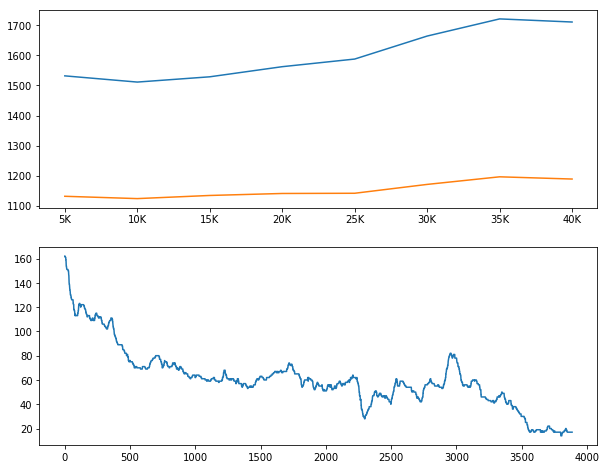

In [70]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 =fig.add_subplot(2, 1, 2)
x=['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K']
ax1.plot(x,pace2015.mean(),x,pace2015[:1000].mean() )
ax2.plot(coords_df.index, coords_df['Altitude'])



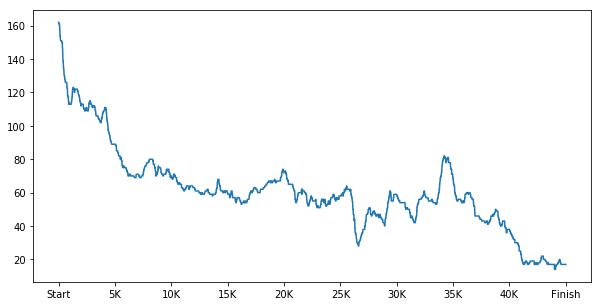

In [65]:
fig,ax=subplots(figsize=(10,5))
ax.plot(coords_df.index,coords_df['Altitude'])
ax.set_xticks(np.linspace(0,3886,num=10))
ax.set_xticklabels(['Start','5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K','Finish'])
fig.savefig("elevation.png",dpi=500)